In [21]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'P052'
plt.rcParams['font.serif'] = ['Times New Roman']

def plot_loss_and_deleted_tokens(layers, loss, deleted_tokens, filename, loss_range=None, deleted_tokens_range=None):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot the loss on the left y-axis
    ax1.set_xlabel('Layer of Delete Gate', size=12)
    ax1.set_ylabel('Cross Entropy Loss', color='tab:blue', size=12)
    ax1.plot(layers, loss, color='tab:blue', marker='o', label='Loss')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    plt.grid(linestyle='--', alpha=0.2, color='tab:blue')

    # Set y-axis range for loss if provided
    if loss_range is not None:
        ax1.set_ylim(loss_range)

    # Create another y-axis to plot the deleted tokens
    ax2 = ax1.twinx()
    ax2.set_ylabel('Sequence Length Reduction (%)', color='tab:orange', size=12)
    ax2.plot(layers, deleted_tokens, color='tab:orange', marker='x', label='Deleted Tokens')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # Set y-axis range for deleted tokens if provided
    if deleted_tokens_range is not None:
        ax2.set_ylim(deleted_tokens_range)

    # Title and layout adjustments
    fig.tight_layout()

    # Show the plot
    plt.grid(linestyle='--', alpha=0.2, color='tab:orange')
    plt.savefig(f"figures/{filename}.pdf")
    plt.show()


In [22]:
BASE_PATH = "eval_results/span_corruption/MrT5/{}.csv"

def get_column_values(file_paths, column_name):
    values = []
    for file_path in file_paths:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(BASE_PATH.format(file_path))
        # Append the value from the specified column (assuming there's one row per file)
        values.append(df[column_name].values[0])
    return values

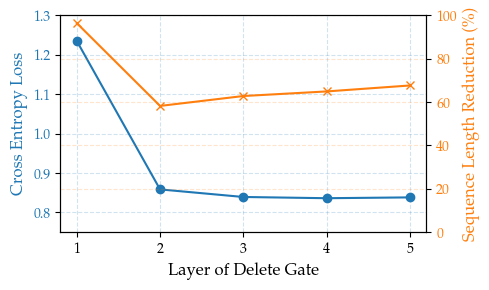

In [23]:
file_paths = [
    'mrt5_span_corruption_0.01_L1_seed28_en_only',
    'mrt5_span_corruption_0.01_L2_seed28_en_only',
    'mrt5_span_corruption_0.01_seed28_en_only',
    'mrt5_span_corruption_0.01_L4_seed28_en_only',
    'mrt5_span_corruption_0.01_L5_seed28_en_only',
]
losses = get_column_values(file_paths, 'Eval Cross Entropy Loss')
deleted_tokens = get_column_values(file_paths, 'Eval Percent Deleted Tokens')
layers = [str(i) for i in range(1, 6)]

plot_loss_and_deleted_tokens(layers, losses, deleted_tokens, "gate_placement_analysis", loss_range=(0.75, 1.3), deleted_tokens_range=(0, 100))

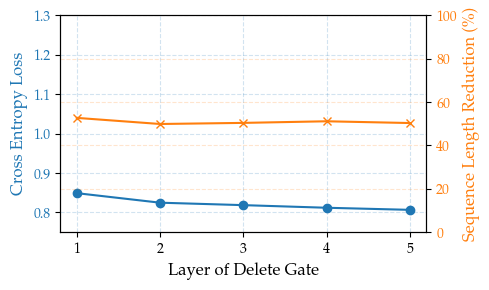

In [24]:
file_paths = [
    'mrt5_span_corruption_pctrl50%_L1_seed39_en_only',
    'mrt5_span_corruption_pctrl50%_L2_seed39_en_only',
    'mrt5_span_corruption_pctrl50%_seed39_en_only',
    'mrt5_span_corruption_pctrl50%_L4_seed39_en_only',
    'mrt5_span_corruption_pctrl50%_L5_seed39_en_only',
]
losses = get_column_values(file_paths, 'Eval Cross Entropy Loss')
deleted_tokens = get_column_values(file_paths, 'Eval Percent Deleted Tokens')
layers = [str(i) for i in range(1, 6)]

plot_loss_and_deleted_tokens(layers, losses, deleted_tokens, "gate_placement_analysis_pctrl50", loss_range=(0.75, 1.3), deleted_tokens_range=(0, 100))